In [ ]:
import numpy as np
import gate_operations as go
import qutip as qt
import random
from functools import reduce

from scipy.sparse import lil_array
from scipy.sparse import csr_matrix
import scipy.sparse

import matplotlib.pyplot as plt

from deutsch_josza_black_box import black_box

def indToState(n, k):
        num = bin(k)[2:].zfill(n)
        return np.array([int(x) for x in str(num)])



# Deutsch-Josza Algorithm

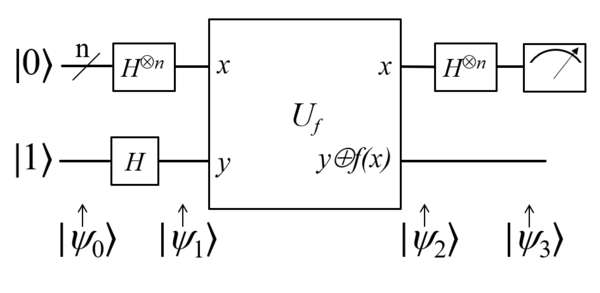
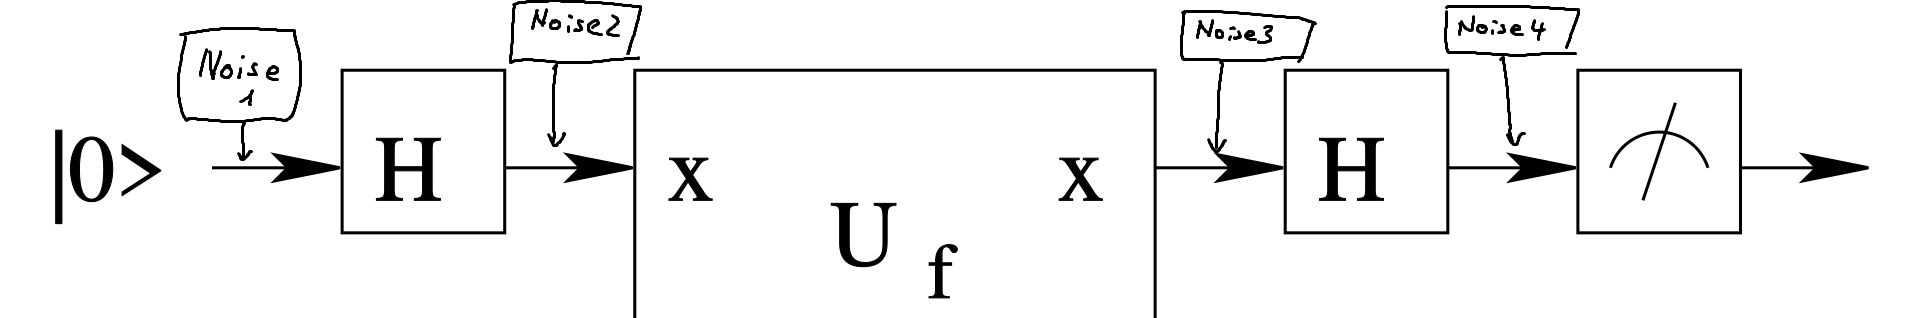

In [67]:
# INPUT SPACE
bits = 3
noise_1 = "bitflip"
p_1 = 0.1
noise_2 = "phaseflip"
p_2 = 0.1
noise_3 = "ampdamp"
p_3 = 0.1
noise_4 = "ampdamp"
p_4 = 0.1

# correct deutsch josza algotithm computation
correct_solution = go.deutsch_josza(black_box, bits)

# prepare hadamard instruction
hadamard_instruction_list = ["H",[]]
bit = 1
while bit <= bits:
    hadamard_instruction_list[1].append(bit)
    bit += 1
hadamard_instuction = go.create_instruction_list([hadamard_instruction_list])

# NOISY COMPUTATION
tests = 1000
test = 0
correct_results = 0

while test < tests:
    # PREPARE STATE
    state = np.zeros((2**bits,))
    state[0] = 1
    state = np.outer(state, state.conj())

    # NOISE SPACE 1
    noise = go.create_instruction_list([[noise_1,p_1,[2]]])
    state = reduce(go.apply_instruction, noise, state)


    # HADAMARD ROUND 1
    state = reduce(go.apply_instruction, hadamard_instuction, state).T

    # NOISE SPACE 2
    noise = go.create_instruction_list([[noise_2,p_2,[2]]])
    state = reduce(go.apply_instruction, noise, state)


    # ORACLE
    row = 0
    col = 0
    while row < state.shape[1]:
        col = 0
        while col < state.shape[0]:
            state[col,row] = state[col,row]*(-1)**black_box(indToState(bits, row))
            state[col,row] = state[col,row]*(-1)**black_box(indToState(bits, col))
            
            col += 1
        row += 1

    # NOISE SPACE 3
    noise = go.create_instruction_list([[noise_3,p_3,[1]]])
    state = reduce(go.apply_instruction, noise, state)


    # HADAMARD ROUND 2
    state = reduce(go.apply_instruction, hadamard_instuction, state).T

    # NOISE SPACE 4
    noise = go.create_instruction_list([[noise_4,p_4,[1]]])
    state = reduce(go.apply_instruction, noise, state)

    # MESUREMENT
    measurements = go.measure_computational(state,bits,1, False)
        
    key = ""
    bit = 1
    while bit <= bits:
        key += "0"
        bit += 1
        
    noisy_solution = measurements[key]

    if noisy_solution == correct_solution:
        correct_results += 1 

    test += 1

correctness = correct_results / tests

print("Correctness probability: " + str(correctness * 100) + " %")


Correctness probability: 78.10000000000001 %
